In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import pandas as pd
from numpy import array
import time

Данные: 45496 текстов, состоящих из 5 предложений каждый.
https://www.cs.rochester.edu/nlp/rocstories/

Задача: классификация предложений по порядковому номеру в тексте (5 классов). Это нужно для сценарного анализа, т.е. выделения в текстах сюжетных линий. Начала таких сюжетов соответствует классу 1, продолжение - классу 2 и т.д.

In [3]:
dt=pd.read_csv('ROCStories_spring2016.csv')
print(len(dt))

45496


In [4]:
# Пример
dt[2550:2560]

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5
2550,1627e176-13fc-4f50-a9f3-c575b92bc16d,Pitcher Perry,Perry was a great baseball pitcher.,He pitched for several games.,Perry worked hard at his craft.,Perry played hard and made it to the champions...,"Now, Perry is in the Baseball Hall of Fame."
2551,03aaa8a5-0e58-45a9-add0-bd1cb846a2c4,Pearl Necklace,Tom wanted to buy his wife a gift.,"But, he couldn't afford one.",He decided to steal something for his wife.,He stole a pearl necklace.,His wife loved the necklace and never found ou...
2552,43371212-23ae-40eb-9cba-5bcde4deaf41,The Vaccine,Mary was unsure about vaccines.,She decided to read up more about them.,She found different sources of information.,Some seemed more legit than others.,It helped Mary make up her mind about vaccines.
2553,2f2fcc80-46d9-4646-9e5f-f42a11a45e68,Cheryl's ipad,Cheryl used her iPad almost constantly.,She carried it around the house while doing ho...,One day she dropped it on the tile floor three...,She was amazed and grateful it hadn't broken.,"Unfortunately, it broke the fourth time she dr..."
2554,21e41c23-f32c-4275-9f12-ee59904f05f7,Shirt that didn't fit,It was Kelly's birthday.,She really was happy to have her party.,When her friends arrived they gave her presents.,Her friend Lucy gave her a shirt.,When Kelly tried it on the shirt didn't fit.
2555,a70e0af0-5b2e-4ad2-8ca7-d3f3350db6ba,Rock n Roll,The band had an exciting performance tonight.,They rocked for hours on the stage.,The audience cheered for them.,Afterwards they left the stage.,The band members took a nap as they headed tow...
2556,51d20c2c-278b-422f-a0f3-d14b9531db06,Shanghai,Sam went for a ride in Shanghai with his family.,There was a giant parade for the New Years.,Sam witnessed a poor man begging on the streets.,He offered the man a dollar.,"The man accepted, then ripped the dollar in fr..."
2557,b343ce86-ac2f-49bf-b5d7-b42575b45a14,Sales,Bob worked in sales.,Bob wanted to sale for his own company.,He quit his job and made a start up.,"With due diligence, he was able to find a supp...",Bob now runs a successful firm.
2558,53f0d9a2-2444-4825-b5c9-628b87395044,Polish American,Beth is polish just like her entire family.,That's all they have ever eaten is polish foods.,Beth just moved out on her own and wanted to t...,She had a cheeseburger for dinner for the firs...,She now loves cheeseburgers and can't wait to ...
2559,88ec63c0-0b81-4bc9-9f77-192a91d4927c,The Rookie,Jack was a rookie on his baseball team.,He had little experience but was eager.,One game other players got injured and he got ...,Jack did very well and impressed everyone.,He was given more play time from then on out.


In [ ]:
#Предложения уже очищенные, предобработка не нужна.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams["figure.figsize"] = (6,6)

In [5]:
N = len(dt)
x, y = [], []
for n in range(N):
    for k in range(2,7):
        x.append(dt.iloc[n][k])
        y.append(k-2)

x = array(x)
y = array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2024, test_size=0.25)
x.shape, y.shape

((227480,), (227480,))

In [37]:
#TruncatedSVD(n_components=300, n_iter=25, random_state=2023),

# Baseline

### Count Vectorizer + Logistic regression

In [52]:
%%time

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.7),
    LogisticRegression(),
)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

/home/surov/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 20.6 s, sys: 55.5 s, total: 1min 16s
Wall time: 7.7 s


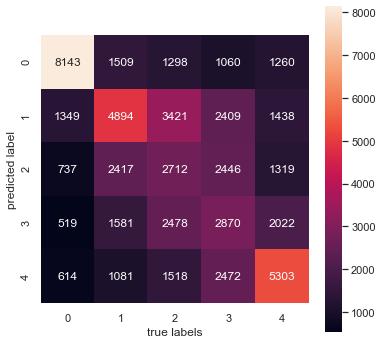

In [53]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66     11362
           1       0.36      0.43      0.39     11482
           2       0.28      0.24      0.26     11427
           3       0.30      0.25      0.28     11257
           4       0.48      0.47      0.47     11342

    accuracy                           0.42     56870
   macro avg       0.41      0.42      0.41     56870
weighted avg       0.41      0.42      0.41     56870



### Tf-Idf Vectorizer + Logistic regression

In [55]:
%%time

model = make_pipeline(
    TfidfVectorizer(stop_words="english", max_df=0.7),
    LogisticRegression()
)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

/home/surov/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 23 s, sys: 1min 5s, total: 1min 28s
Wall time: 8.71 s


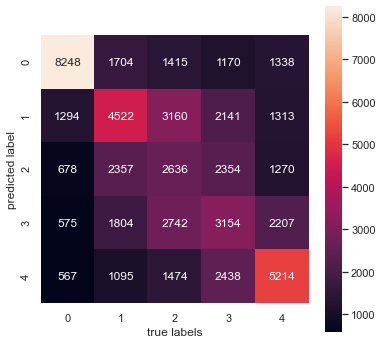

In [56]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65     11362
           1       0.36      0.39      0.38     11482
           2       0.28      0.23      0.25     11427
           3       0.30      0.28      0.29     11257
           4       0.48      0.46      0.47     11342

    accuracy                           0.42     56870
   macro avg       0.41      0.42      0.41     56870
weighted avg       0.41      0.42      0.41     56870



### Count Vectorizer + Bayes

In [58]:
%%time

model = make_pipeline(
    CountVectorizer(stop_words="english", max_df=0.7),
    MultinomialNB()
)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

CPU times: user 1.34 s, sys: 854 µs, total: 1.34 s
Wall time: 1.34 s


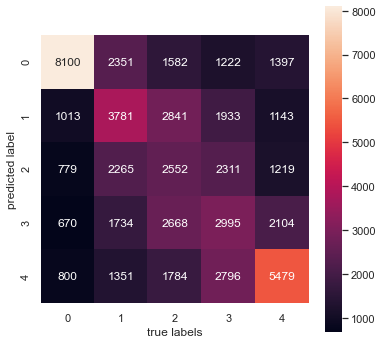

In [59]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62     11362
           1       0.35      0.33      0.34     11482
           2       0.28      0.22      0.25     11427
           3       0.29      0.27      0.28     11257
           4       0.45      0.48      0.47     11342

    accuracy                           0.40     56870
   macro avg       0.39      0.40      0.39     56870
weighted avg       0.39      0.40      0.39     56870



### Tf-Idf Vectorizer + Bayes

In [61]:
%%time

model = make_pipeline(
    TfidfVectorizer(stop_words="english", max_df=0.7),
    MultinomialNB()
)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

CPU times: user 1.42 s, sys: 571 µs, total: 1.42 s
Wall time: 1.42 s


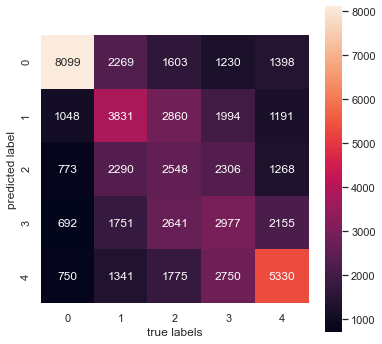

In [62]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt="d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62     11362
           1       0.35      0.33      0.34     11482
           2       0.28      0.22      0.25     11427
           3       0.29      0.26      0.28     11257
           4       0.45      0.47      0.46     11342

    accuracy                           0.40     56870
   macro avg       0.38      0.40      0.39     56870
weighted avg       0.38      0.40      0.39     56870



# Вывод: все модели сносно распознают начало и конец текста. Предложения в середине различают слабо.